In [0]:
import torchvision
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torch import optim


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
class To3Channels(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        if sample.shape[0] < 3:
            sample = torch.squeeze(sample)
            sample = torch.stack([sample, sample,sample], 0)

        return sample

In [0]:
transformer =  torchvision.transforms.Compose(
    [
     torchvision.transforms.ToTensor()])
     #To3Channels(),
     #torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

CIFAR10_train = torchvision.datasets.CIFAR10("../datasets/CIFAR10/", train=True, transform=transformer, target_transform=None, download=True)
CIFAR100_train = torchvision.datasets.CIFAR100("../datasets/CIFAR100/", train=True, transform=transformer, target_transform=None, download=True)
FashionMNIST_train = torchvision.datasets.FashionMNIST("../datasets/FashionMNIST/", train=True, transform=transformer, target_transform=None, download=True)




CIFAR10_test = torchvision.datasets.CIFAR10("../datasets/CIFAR10/", train=False, transform=transformer, target_transform=None, download=True)
CIFAR100_test = torchvision.datasets.CIFAR100("../datasets/CIFAR100/", train=False, transform=transformer, target_transform=None, download=True)
FashionMNIST_test = torchvision.datasets.FashionMNIST("../datasets/FashionMNIST/", train=False, transform=transformer, target_transform=None, download=True)






Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [0]:
def get_loaders(dataset = "CIFAR10"):
    train_loader = None
    test_loader = None
    labels_num = None

    if dataset == "CIFAR10":
        train_loader = torch.utils.data.DataLoader(CIFAR10_train, batch_size=64,
                                          shuffle=True, num_workers=2)
        test_loader = torch.utils.data.DataLoader(CIFAR10_test, batch_size=64,
                                          shuffle=True, num_workers=2)
        labels_num = 10#len(set(CIFAR10_train.train_labels))
    elif dataset == "CIFAR100":
        train_loader = torch.utils.data.DataLoader(CIFAR100_train, batch_size=32,
                                                   shuffle=True, num_workers=2)
        test_loader = torch.utils.data.DataLoader(CIFAR100_test, batch_size=2,
                                                  shuffle=True, num_workers=2)
        labels_num = 100

    elif dataset == "FASHION_MNIST":
        train_loader = torch.utils.data.DataLoader(FashionMNIST_train, batch_size=64,
                                                   shuffle=True, num_workers=2)
        test_loader = torch.utils.data.DataLoader(FashionMNIST_test, batch_size=64,
                                                  shuffle=True, num_workers=2)
        labels_num = len(set(FashionMNIST_train.train_labels))


    return train_loader,test_loader,labels_num

In [0]:
class VGG16(nn.Module):
    def __init__(self,num_classes):
        super(VGG16, self).__init__()

        self.conv1_1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv1_1.weight)
        self.actv1_1 = nn.ReLU()
        self.conv1_2 = nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv1_2.weight)
        self.actv1_2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(stride=2,kernel_size=2)

        self.conv2_1 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv2_1.weight)
        self.actv2_1 = nn.ReLU()
        self.conv2_2 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv2_2.weight)
        self.actv2_2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(stride=2,kernel_size=2)

        self.conv3_1 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv3_1.weight)
        self.actv3_1 = nn.ReLU()
        self.conv3_2 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv3_2.weight)
        self.actv3_2 = nn.ReLU()
        self.conv3_3 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv3_3.weight)
        self.actv3_3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(stride=2,kernel_size=2)

        self.conv4_1 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv4_1.weight)
        self.actv4_1 = nn.ReLU()
        self.conv4_2 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv4_2.weight)
        self.actv4_2 = nn.ReLU()
        self.conv4_3 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv4_3.weight)
        self.actv4_3 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(stride=2,kernel_size=2)

        self.conv5_1 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv5_1.weight)
        self.actv5_1 = nn.ReLU()
        self.conv5_2 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv5_2.weight)
        self.actv5_2 = nn.ReLU()
        self.conv5_3 = nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1)
        nn.init.xavier_uniform_(self.conv5_3.weight)
        self.actv5_3 = nn.ReLU()
        self.pool5 = nn.MaxPool2d(stride=2,kernel_size=2)

        self.fc6 = nn.Linear(3*3*64,1000)
        nn.init.xavier_uniform_(self.fc6.weight)
        
        self.actv6 = nn.ReLU()
        self.dropout6 = nn.Dropout(0.5)

        self.fc7 = nn.Linear(1000,1000)
        nn.init.xavier_uniform_(self.fc7.weight)
        
        self.actv7 = nn.ReLU()
        self.dropout7 = nn.Dropout(0.5)

        self.fc8 = nn.Linear(7*7*32,num_classes)
        nn.init.xavier_uniform_(self.fc8.weight)
        

    def forward(self, x):

        x = self.actv1_1(self.conv1_1(x))
        x = self.actv1_2(self.conv1_2(x))
        x = self.pool1(x)

        x = self.actv2_1(self.conv2_1(x))
        x = self.actv2_2(self.conv2_2(x))
        x = self.pool2(x)

        x = self.actv3_1(self.conv3_1(x))
        x = self.actv3_2(self.conv3_2(x))
        x = self.actv3_3(self.conv3_3(x))
        x = self.pool3(x)

        x = self.actv4_1(self.conv4_1(x))
        x = self.actv4_2(self.conv4_2(x))
        x = self.actv4_3(self.conv4_3(x))
        x = self.pool4(x)

        x = self.actv5_1(self.conv5_1(x))
        x = self.actv5_2(self.conv5_2(x))
        x = self.actv5_3(self.conv5_3(x))
        x = self.pool5(x)

        x = torch.flatten(x, start_dim=1)

        x = self.actv6(self.fc6(x))

        x = self.actv7(self.fc7(x))

        x =  self.fc8(x)
        return x
   



In [0]:
def compute_accuracy(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [0]:
def train(net,trainloader,testloader,optim_name = "adam",epochs = 30):
    optimizer = optim.Adam(net.parameters(),lr= 0.01,weight_decay=0.0005)
    if optim_name == "sgd":
        optimizer = optim.SGD(net.parameters(),0.01,0.9)

    criterion = torch.nn.CrossEntropyLoss()
    losses = []
    accuracies = []
    for epoch in range(epochs):
        running_loss = 0.0
        net.train()
        for i,data in enumerate(trainloader,0):
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 200 == 199:  # print every 100 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
                losses.append(running_loss/200)
                running_loss = 0.0

        accuracy = compute_accuracy(net,testloader)
        accuracies.append(accuracy)
        print('Accuracy of the network on the test images: %.3f' % accuracy)

    return accuracies,losses


In [0]:
from google.colab import files
def run(dataset = "CIFAR10",epochs = 30):
    trainloader, testloader, num_classes = get_loaders(dataset)

    net = VGG16(num_classes)
    net.to(device)

    accuracies, losses = train(net, trainloader, testloader,optim_name = "sgd",epochs=epochs)

    
    
    
    f = plt.figure(1)
    x = np.linspace(0, 1, len(losses))
    plt.plot(x,losses)
    f.show()

    g = plt.figure(2)
    x = np.linspace(0, 1, len(accuracies))
    plt.plot(x, accuracies, figure = g)
    g.show()
    
    

    
    #files.download( dataset + "_loss.png") 
    
    
    plt.show()
    #files.download( dataset + "_accuracy.png")
    
 

In [0]:
#run(epochs=15)

In [0]:
#run("CIFAR100",30)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


[1,   200] loss: 4.219
[1,   400] loss: 2.345
[1,   600] loss: 1.115
[1,   800] loss: 0.601
Accuracy of the network on the test images: 0.806
[2,   200] loss: 0.491
[2,   400] loss: 0.429
[2,   600] loss: 0.413
[2,   800] loss: 0.407
Accuracy of the network on the test images: 0.847
[3,   200] loss: 0.370
[3,   400] loss: 0.369
[3,   600] loss: 0.362
[3,   800] loss: 0.346
Accuracy of the network on the test images: 0.867
[4,   200] loss: 0.335
[4,   400] loss: 0.322
[4,   600] loss: 0.318
[4,   800] loss: 0.321
Accuracy of the network on the test images: 0.869
[5,   200] loss: 0.313
[5,   400] loss: 0.306
[5,   600] loss: 0.310
[5,   800] loss: 0.299
Accuracy of the network on the test images: 0.880
[6,   200] loss: 0.294
[6,   400] loss: 0.297
[6,   600] loss: 0.285
[6,   800] loss: 0.287
Accuracy of the network on the test images: 0.888
[7,   200] loss: 0.268
[7,   400] loss: 0.278
[7,   600] loss: 0.297
[7,   800] loss: 0.282
Accuracy of the network on the test images: 0.887
[8,   

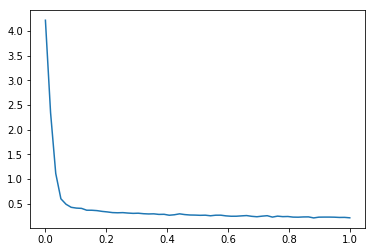

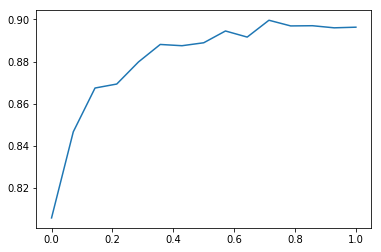

In [0]:
run("FASHION_MNIST",15)